In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
sns.set(style="darkgrid", font_scale=1.2)
sns.set_palette("dark")

In [3]:
df  = pd.read_csv('/content/nepali_students_dataset.csv')

In [4]:
df.head()

,Name,Roll_no,Class,CGPA,IQ,Age
0,Pooja Joshi,1,BIM,3.20,78.8,18
1,Bhawana Koirala,2,BSc CSIT,2.94,93.7,17
2,Hari Maharjan,3,BSc CSIT,3.26,94.9,24
3,Sanjana Khadka,4,BCA,3.61,88.0,17
4,Rajesh Shrestha,5,BCA,2.91,97.6,25


In [5]:
numerical_df = ['CGPA', 'IQ', 'Age']

In [6]:
df[numerical_df].head()

,CGPA,IQ,Age
0,3.20,78.8,18
1,2.94,93.7,17
2,3.26,94.9,24
3,3.61,88.0,17
4,2.91,97.6,25


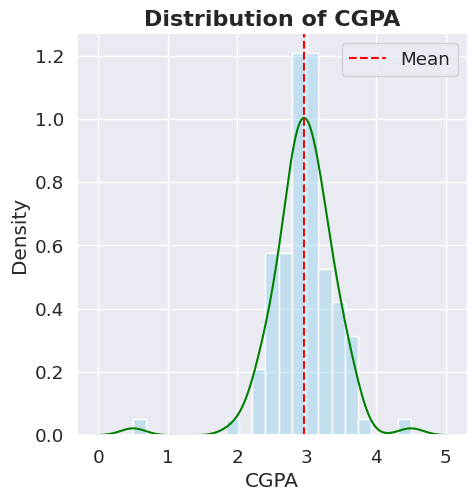

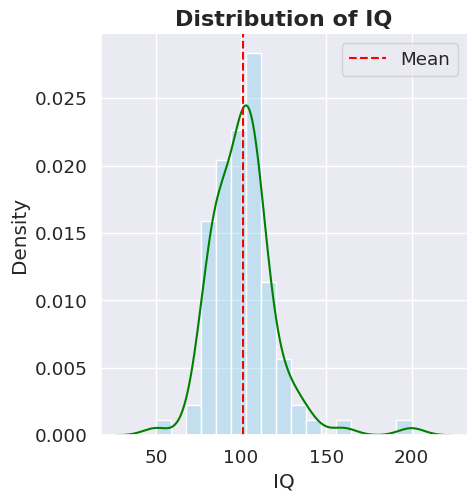

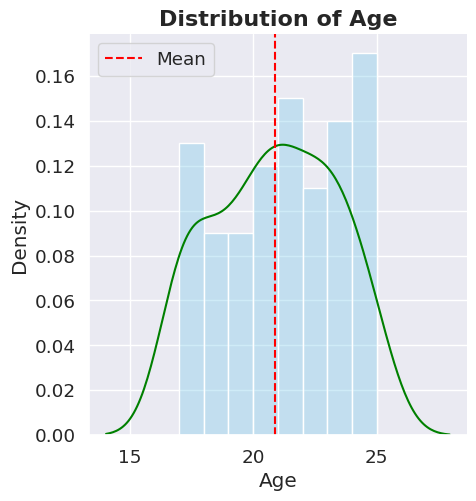

In [7]:
for i in df[numerical_df].columns :
  sns.displot(df[i], color="skyblue", stat="density", alpha = 0.4 )
  sns.kdeplot(df[i], color="green")
  plt.axvline(df[i].mean(), color='red', linestyle='--', label='Mean')
  plt.title(f"Distribution of {i}", fontsize=16, fontweight='bold')
  plt.legend()
  plt.show()

In [8]:
normal_df = df[numerical_df].drop(columns = ['IQ','Age'])

In [9]:
normal_df.head()

,CGPA
0,3.20
1,2.94
2,3.26
3,3.61
4,2.91


In [10]:
z_score = zscore(normal_df)  #zscore calculation

In [11]:
normal_df['CGPA'].shape

(100,)

In [35]:
upper_bound = 3
lower_bound = -3

df_with_no_outliers = normal_df[(z_score > lower_bound).all(axis=1) & (z_score < upper_bound).all(axis=1)]
df_with_outliers = normal_df[(z_score <= lower_bound).any(axis=1) | (z_score >= upper_bound).any(axis=1)]

In [36]:
df_with_no_outliers.head()

,CGPA
0,3.20
1,2.94
2,3.26
3,3.61
4,2.91


In [37]:
df_with_outliers.head()  # detected outliers

,CGPA
10,4.5
79,0.5


In [27]:
df_with_no_outliers['CGPA'].shape      #previous shape of CGPA was (100,) : removed 2 outliers, resulted in shape of (98,)

(98,)

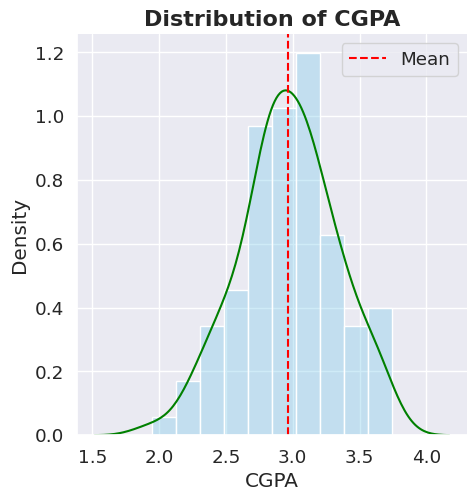

In [28]:
for i in df_with_no_outliers.columns :
  sns.displot(df_with_no_outliers[i], color="skyblue", stat="density", alpha = 0.4 )
  sns.kdeplot(df_with_no_outliers[i], color="green")
  plt.axvline(df_with_no_outliers[i].mean(), color='red', linestyle='--', label='Mean')
  plt.title(f"Distribution of {i}", fontsize=16, fontweight='bold')
  plt.legend()
  plt.show()